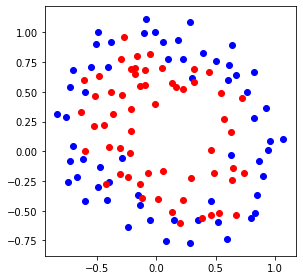

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

data    = np.genfromtxt("data-nonlinear.txt", delimiter=',')

pointX  = data[:, 0:1]
pointY  = data[:, 1:2]
label   = data[:, 2:3]

pointX0 = pointX[label == 0]
pointY0 = pointY[label == 0]

pointX1 = pointX[label == 1]
pointY1 = pointY[label == 1]

plt.figure()
plt.scatter(pointX0, pointY0, c='b')
plt.scatter(pointX1, pointY1, c='r')
plt.tight_layout()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


In [2]:
m = len(pointX)

zero_term = np.ones((1,m))
x = pointX.T
y = pointY.T
xy = x * y
x2 = x * x
y2 = y * y
x3 = x2 * x
x2y = xy * x
xy2 = xy * y
y3 = y2 * y
x4 = x2 * x2
x3y1 = x3 * y
x2y2 = xy * xy
x1y3 = xy2 * y
y4 = y2 * y2

feature = np.concatenate((zero_term, x, y, xy, x2, y2, 
                          x3, x2y, xy2, y3, x4, x3y1, 
                          x2y2, x1y3, y4), axis=0)

label = label.T

learning_rate = 0.03
#lamda = 1000

theta = np. ones((15, 1))
theta[0,0]=20
theta[1,0]=5
theta[2,0]=5
theta[3,0]=1
theta[4,0]=10
theta[5,0]=10
theta[6,0]=1
theta[7,0]=1
theta[8,0]=1
theta[9,0]=1
theta[10,0]=1
theta[11,0]=1
theta[12,0]=1
theta[13,0]=1
theta[14,0]=1

list_theta_00 = list()
list_theta_01 = list()
list_theta_02 = list()
list_theta_03 = list()
list_theta_04 = list()

list_theta_05 = list()
list_theta_06 = list()
list_theta_07 = list()
list_theta_08 = list()
list_theta_09 = list()

list_theta_10 = list()
list_theta_11 = list()
list_theta_12 = list()
list_theta_13 = list()
list_theta_14 = list()

t = 1
iteration = list()
temp_j_value = 0
j_value = list()

In [3]:
while True:
    g = (theta.T).dot(feature)
    sigmoid = 1 / (1 + np.exp(-g))
    
    if t>1 and abs(temp_j_value - (-(np.sum((label*np.log(sigmoid))+(1-label)*np.log(1-sigmoid)))/m)) <= 0.000001:
        fin_theta = theta
        break
    temp_j_value = -(np.sum((label*np.log(sigmoid))+(1-label)*np.log(1-sigmoid)))/m
    j_value.append(temp_j_value)
    iteration.append(t)
    print(t, temp_j_value, '\n')
    t += 1

    list_theta_00.append(theta[0,0])
    list_theta_01.append(theta[1,0])
    list_theta_02.append(theta[2,0])
    list_theta_03.append(theta[3,0])
    list_theta_04.append(theta[4,0])
    list_theta_05.append(theta[5,0])
    list_theta_06.append(theta[6,0])
    list_theta_07.append(theta[7,0])
    list_theta_08.append(theta[8,0])
    list_theta_09.append(theta[9,0])
    list_theta_10.append(theta[10,0])
    list_theta_11.append(theta[11,0])
    list_theta_12.append(theta[12,0])
    list_theta_13.append(theta[13,0])
    list_theta_14.append(theta[14,0])
    
    theta = theta - learning_rate * feature.dot((sigmoid-label).T) / m

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """


1 inf 

2 inf 

3 inf 

4 inf 

5 inf 

6 inf 

7 inf 

8 inf 

9 inf 

10 inf 

11 inf 

12 inf 

13 inf 

14 inf 

15 inf 

16 inf 

17 inf 

18 inf 

19 inf 

20 inf 

21 inf 

22 inf 

23 inf 

24 inf 

25 inf 

26 inf 

27 inf 

28 inf 

29 inf 

30 inf 

31 inf 

32 inf 

33 inf 

34 inf 

35 inf 

36 inf 

37 inf 

38 inf 

39 inf 

40 inf 

41 inf 

42 inf 

43 inf 

44 inf 

45 inf 

46 inf 

47 inf 

48 inf 

49 inf 

50 inf 

51 inf 

52 inf 

53 inf 

54 inf 

55 inf 

56 inf 

57 inf 

58 inf 

59 inf 

60 inf 

61 inf 

62 inf 

63 inf 

64 inf 

65 inf 

66 inf 

67 inf 

68 inf 

69 inf 

70 inf 

71 inf 

72 inf 

73 inf 

74 inf 

75 inf 

76 inf 

77 inf 

78 inf 

79 inf 

80 inf 

81 inf 

82 inf 

83 inf 

84 inf 

85 inf 

86 inf 

87 inf 

88 inf 

89 inf 

90 inf 

91 inf 

92 inf 

93 inf 

94 inf 

95 inf 

96 inf 

97 inf 

98 inf 

99 inf 

100 inf 

101 inf 

102 inf 

103 inf 

104 inf 

105 inf 

106 inf 

107 inf 

108 inf 

109 inf 

110 inf 

111 inf 

491 9.425122122344415 

492 9.413896553782575 

493 9.402674968741032 

494 9.391452776720458 

495 9.38022778848768 

496 9.369006323314332 

497 9.35777953317664 

498 9.346557788349532 

499 9.33533835233105 

500 9.32411345615877 

501 9.312892528405701 

502 9.30166763876703 

503 9.290444515366817 

504 9.279221891272579 

505 9.26799763167972 

506 9.256775031340071 

507 9.245555127264838 

508 9.234329566439898 

509 9.223107010279007 

510 9.211885849424286 

511 9.200663325764124 

512 9.189437965950628 

513 9.17821744482598 

514 9.166992467895255 

515 9.155770566600502 

516 9.144546443978863 

517 9.133325313042109 

518 9.122100935728348 

519 9.11087904345907 

520 9.099656326115676 

521 9.088433272375983 

522 9.077209126390773 

523 9.065987224662338 

524 9.054764831322704 

525 9.043540649348074 

526 9.032318696094833 

527 9.021096092666495 

528 9.009872098669733 

529 8.99864995456784 

530 8.987427114848312 

531 8.976204131679658 

532 8.964981745710336 

5


991 3.822171920798907 

992 3.8110926415115323 

993 3.800015857214101 

994 3.7889416130249307 

995 3.7778699549216244 

996 3.766800929751108 

997 3.7557345852578568 

998 3.744670970084223 

999 3.733610133803141 

1000 3.7225521269318884 

1001 3.7114970009450476 

1002 3.7004448083051145 

1003 3.6893956024708454 

1004 3.6783494379208204 

1005 3.6673063701778177 

1006 3.656266455820703 

1007 3.6452297525155792 

1008 3.634196319025775 

1009 3.623166215243682 

1010 3.6121395022051668 

1011 3.601116242118183 

1012 3.5900964983803507 

1013 3.5790803356038774 

1014 3.568067819644245 

1015 3.557059017613366 

1016 3.546053997916398 

1017 3.5350528302683415 

1018 3.5240555857218228 

1019 3.5130623366956306 

1020 3.502073156994827 

1021 3.4910881218451126 

1022 3.480107307912356 

1023 3.469130793335737 

1024 3.458158657754746 

1025 3.447190982333643 

1026 3.4362278497973326 

1027 3.4252693444551743 

1028 3.414315552230051 

1029 3.403366560696349 

1030 3.392422

1490 0.8159227540504216 

1491 0.8148324928192041 

1492 0.8137492588407209 

1493 0.8126730005410973 

1494 0.811603666586421 

1495 0.8105412058840382 

1496 0.8094855675838548 

1497 0.808436701079637 

1498 0.807394556010311 

1499 0.8063590822612582 

1500 0.8053302299656065 

1501 0.8043079495055104 

1502 0.8032921915134218 

1503 0.8022829068733471 

1504 0.8012800467220901 

1505 0.8002835624504785 

1506 0.7992934057045705 

1507 0.7983095283868413 

1508 0.7973318826573462 

1509 0.7963604209348637 

1510 0.7953950958980069 

1511 0.7944358604863149 

1512 0.7934826679013081 

1513 0.7925354716075217 

1514 0.7915942253335022 

1515 0.7906588830727741 

1516 0.7897293990847732 

1517 0.7888057278957465 

1518 0.7878878242996139 

1519 0.7869756433587968 

1520 0.7860691404050083 

1521 0.7851682710400048 

1522 0.7842729911363018 

1523 0.7833832568378463 

1524 0.7824990245606548 

1525 0.7816202509934064 

1526 0.7807468930979976 

1527 0.7798789081100556 

1528 0.77901625

1990 0.6144170218253729 

1991 0.6142618717632533 

1992 0.6141070739025825 

1993 0.6139526268847573 

1994 0.6137985293574841 

1995 0.613644779974741 

1996 0.613491377396741 

1997 0.6133383202898955 

1998 0.6131856073267773 

1999 0.6130332371860846 

2000 0.6128812085526049 

2001 0.6127295201171801 

2002 0.61257817057667 

2003 0.612427158633919 

2004 0.6122764829977206 

2005 0.612126142382782 

2006 0.6119761355096917 

2007 0.6118264611048843 

2008 0.6116771179006084 

2009 0.611528104634892 

2010 0.6113794200515102 

2011 0.6112310628999519 

2012 0.6110830319353884 

2013 0.6109353259186395 

2014 0.6107879436161439 

2015 0.6106408837999253 

2016 0.6104941452475623 

2017 0.6103477267421563 

2018 0.6102016270723019 

2019 0.6100558450320548 

2020 0.6099103794209028 

2021 0.6097652290437336 

2022 0.6096203927108073 

2023 0.6094758692377241 

2024 0.6093316574453984 

2025 0.6091877561600243 

2026 0.6090441642130524 

2027 0.6089008804411563 

2028 0.608757903686

2490 0.5630744504037982 

2491 0.5630024247329009 

2492 0.562930468740738 

2493 0.5628585822475916 

2494 0.5627867650744053 

2495 0.5627150170427839 

2496 0.5626433379749899 

2497 0.5625717276939398 

2498 0.562500186023203 

2499 0.5624287127869989 

2500 0.5623573078101927 

2501 0.5622859709182946 

2502 0.5622147019374566 

2503 0.5621435006944695 

2504 0.5620723670167611 

2505 0.5620013007323924 

2506 0.5619303016700565 

2507 0.5618593696590746 

2508 0.5617885045293942 

2509 0.5617177061115872 

2510 0.5616469742368463 

2511 0.5615763087369823 

2512 0.5615057094444228 

2513 0.5614351761922088 

2514 0.5613647088139926 

2515 0.561294307144035 

2516 0.5612239710172032 

2517 0.5611537002689676 

2518 0.5610834947354009 

2519 0.5610133542531738 

2520 0.5609432786595538 

2521 0.5608732677924024 

2522 0.5608033214901734 

2523 0.5607334395919077 

2524 0.560663621937236 

2525 0.5605938683663712 

2526 0.5605241787201094 

2527 0.5604545528398263 

2528 0.560384990

2990 0.5332326939607364 

2991 0.5331820023939234 

2992 0.5331313377095525 

2993 0.5330806998722232 

2994 0.5330300888466311 

2995 0.5329795045975673 

2996 0.5329289470899179 

2997 0.5328784162886634 

2998 0.5328279121588795 

2999 0.5327774346657347 

3000 0.5327269837744925 

3001 0.5326765594505086 

3002 0.5326261616592327 

3003 0.5325757903662064 

3004 0.5325254455370642 

3005 0.5324751271375323 

3006 0.5324248351334286 

3007 0.5323745694906626 

3008 0.5323243301752346 

3009 0.5322741171532358 

3010 0.5322239303908474 

3011 0.5321737698543413 

3012 0.5321236355100784 

3013 0.5320735273245095 

3014 0.5320234452641744 

3015 0.5319733892957017 

3016 0.5319233593858079 

3017 0.5318733555012986 

3018 0.5318233776090666 

3019 0.5317734256760923 

3020 0.5317234996694432 

3021 0.5316735995562739 

3022 0.5316237253038255 

3023 0.5315738768794253 

3024 0.5315240542504867 

3025 0.5314742573845083 

3026 0.5314244862490748 

3027 0.5313747408118552 

3028 0.53132

3549 0.5083369587184307 

3550 0.5082975935285071 

3551 0.5082582440764282 

3552 0.5082189103508847 

3553 0.5081795923405837 

3554 0.5081402900342488 

3555 0.5081010034206198 

3556 0.5080617324884525 

3557 0.5080224772265197 

3558 0.5079832376236096 

3559 0.5079440136685269 

3560 0.5079048053500922 

3561 0.5078656126571423 

3562 0.5078264355785301 

3563 0.5077872741031244 

3564 0.50774812821981 

3565 0.5077089979174874 

3566 0.5076698831850729 

3567 0.5076307840114991 

3568 0.5075917003857138 

3569 0.507552632296681 

3570 0.50751357973338 

3571 0.5074745426848062 

3572 0.5074355211399701 

3573 0.507396515087898 

3574 0.507357524517632 

3575 0.5073185494182293 

3576 0.5072795897787625 

3577 0.50724064558832 

3578 0.5072017168360057 

3579 0.5071628035109378 

3580 0.5071239056022511 

3581 0.5070850230990949 

3582 0.5070461559906337 

3583 0.5070073042660476 

3584 0.5069684679145317 

3585 0.5069296469252959 

3586 0.5068908412875652 

3587 0.50685205099058

4036 0.4908426858017449 

4037 0.4908098866061954 

4038 0.49077709901163635 

4039 0.49074432301158466 

4040 0.4907115585995627 

4041 0.4906788057690989 

4042 0.4906460645137281 

4043 0.49061333482699027 

4044 0.49058061670243186 

4045 0.49054791013360494 

4046 0.4905152151140676 

4047 0.49048253163738387 

4048 0.49044985969712357 

4049 0.49041719928686234 

4050 0.49038455040018153 

4051 0.49035191303066866 

4052 0.49031928717191703 

4053 0.4902866728175255 

4054 0.4902540699610992 

4055 0.4902214785962482 

4056 0.49018889871658944 

4057 0.4901563303157451 

4058 0.4901237733873429 

4059 0.490091227925017 

4060 0.4900586939224066 

4061 0.49002617137315707 

4062 0.4899936602709196 

4063 0.48996116060935085 

4064 0.48992867238211324 

4065 0.489896195582875 

4066 0.4898637302053101 

4067 0.489831276243098 

4068 0.48979883368992405 

4069 0.48976640253947923 

4070 0.48973398278546015 

4071 0.4897015744215692 

4072 0.4896691774415143 

4073 0.4896367918390088

4601 0.4739869984678553 

4602 0.47395986732995565 

4603 0.4739327448666643 

4604 0.47390563107383177 

4605 0.4738785259473114 

4606 0.47385142948296 

4607 0.4738243416766367 

4608 0.47379726252420384 

4609 0.4737701920215264 

4610 0.4737431301644725 

4611 0.47371607694891305 

4612 0.47368903237072163 

4613 0.47366199642577494 

4614 0.47363496910995273 

4615 0.47360795041913717 

4616 0.47358094034921355 

4617 0.47355393889607006 

4618 0.4735269460555975 

4619 0.4734999618236898 

4620 0.4734729861962436 

4621 0.4734460191691586 

4622 0.4734190607383372 

4623 0.47339211089968436 

4624 0.4733651696491083 

4625 0.4733382369825201 

4626 0.4733113128958333 

4627 0.47328439738496475 

4628 0.4732574904458336 

4629 0.4732305920743622 

4630 0.4732037022664757 

4631 0.47317682101810193 

4632 0.4731499483251718 

4633 0.47312308418361876 

4634 0.473096228589379 

4635 0.47306938153839195 

4636 0.4730425430265993 

4637 0.4730157130499462 

4638 0.4729888916043801 



5156 0.4601554352086544 

5157 0.4601325527765701 

5158 0.4601096770922423 

5159 0.46008680815277375 

5160 0.46006394595526945 

5161 0.4600410904968354 

5162 0.46001824177458006 

5163 0.45999539978561327 

5164 0.4599725645270467 

5165 0.45994973599599376 

5166 0.4599269141895695 

5167 0.4599040991048909 

5168 0.45988129073907646 

5169 0.4598584890892468 

5170 0.4598356941525238 

5171 0.4598129059260314 

5172 0.4597901244068951 

5173 0.45976734959224214 

5174 0.4597445814792017 

5175 0.4597218200649043 

5176 0.4596990653464826 

5177 0.4596763173210708 

5178 0.4596535759858047 

5179 0.45963084133782195 

5180 0.4596081133742623 

5181 0.4595853920922662 

5182 0.4595626774889768 

5183 0.45953996956153864 

5184 0.45951726830709794 

5185 0.45949457372280267 

5186 0.4594718858058024 

5187 0.4594492045532486 

5188 0.4594265299622942 

5189 0.4594038620300942 

5190 0.459381200753805 

5191 0.4593585461305848 

5192 0.4593358981575935 

5193 0.4593132568319928 

51

5656 0.44950017192044955 

5657 0.44948033484158056 

5658 0.44946050325391773 

5659 0.44944067715528707 

5660 0.44942085654351543 

5661 0.44940104141643084 

5662 0.4493812317718629 

5663 0.44936142760764186 

5664 0.4493416289215994 

5665 0.44932183571156864 

5666 0.44930204797538337 

5667 0.44928226571087904 

5668 0.44926248891589193 

5669 0.4492427175882597 

5670 0.4492229517258211 

5671 0.4492031913264161 

5672 0.4491834363878857 

5673 0.44916368690807257 

5674 0.44914394288481985 

5675 0.4491242043159723 

5676 0.4491044711993758 

5677 0.44908474353287736 

5678 0.44906502131432496 

5679 0.44904530454156844 

5680 0.4490255932124579 

5681 0.44900588732484503 

5682 0.448986186876583 

5683 0.4489664918655255 

5684 0.4489468022895278 

5685 0.44892711814644654 

5686 0.4489074394341391 

5687 0.4488877661504639 

5688 0.4488680982932811 

5689 0.4488484358604517 

5690 0.4488287788498378 

5691 0.44880912725930283 

5692 0.4487894810867112 

5693 0.4487698403299


6156 0.44022448593183017 

6157 0.44020714577462156 

6158 0.44018981015358494 

6159 0.4401724790670465 

6160 0.440155152513333 

6161 0.4401378304907724 

6162 0.44012051299769317 

6163 0.44010320003242487 

6164 0.4400858915932978 

6165 0.44006858767864304 

6166 0.44005128828679235 

6167 0.44003399341607874 

6168 0.44001670306483587 

6169 0.439999417231398 

6170 0.4399821359141006 

6171 0.4399648591112798 

6172 0.43994758682127233 

6173 0.4399303190424162 

6174 0.43991305577304995 

6175 0.43989579701151316 

6176 0.43987854275614574 

6177 0.43986129300528914 

6178 0.4398440477572852 

6179 0.43982680701047655 

6180 0.43980957076320704 

6181 0.4397923390138209 

6182 0.4397751117606636 

6183 0.43975788900208074 

6184 0.4397406707364196 

6185 0.4397234569620278 

6186 0.43970624767725386 

6187 0.43968904288044725 

6188 0.4396718425699581 

6189 0.4396546467441374 

6190 0.439637455401337 

6191 0.43962026853990943 

6192 0.4396030861582084 

6193 0.4395859082545

6698 0.43144978306298226 

6699 0.43143467641324323 

6700 0.43141957350217847 

6701 0.4314044743284977 

6702 0.4313893788909113 

6703 0.4313742871881304 

6704 0.4313591992188668 

6705 0.4313441149818325 

6706 0.4313290344757405 

6707 0.4313139576993043 

6708 0.43129888465123767 

6709 0.43128381533025567 

6710 0.4312687497350731 

6711 0.43125368786440604 

6712 0.43123862971697074 

6713 0.4312235752914842 

6714 0.4312085245866642 

6715 0.4311934776012287 

6716 0.4311784343338965 

6717 0.43116339478338706 

6718 0.43114835894842024 

6719 0.4311333268277166 

6720 0.4311182984199972 

6721 0.43110327372398366 

6722 0.43108825273839874 

6723 0.4310732354619648 

6724 0.43105822189340554 

6725 0.431043212031445 

6726 0.4310282058748078 

6727 0.4310132034222191 

6728 0.430998204672405 

6729 0.43098320962409153 

6730 0.4309682182760058 

6731 0.43095323062687557 

6732 0.4309382466754287 

6733 0.4309232664203942 

6734 0.4309082898605011 

6735 0.4308933169944796 



7199 0.4243241988966668 

7200 0.4243108152622827 

7201 0.4242974347878997 

7202 0.42428405747248543 

7203 0.42427068331500867 

7204 0.42425731231443814 

7205 0.4242439444697433 

7206 0.424230579779894 

7207 0.42421721824386066 

7208 0.42420385986061376 

7209 0.42419050462912455 

7210 0.42417715254836474 

7211 0.4241638036173062 

7212 0.4241504578349215 

7213 0.4241371152001837 

7214 0.424123775712066 

7215 0.4241104393695423 

7216 0.42409710617158686 

7217 0.42408377611717424 

7218 0.42407044920527975 

7219 0.4240571254348789 

7220 0.4240438048049477 

7221 0.42403048731446263 

7222 0.4240171729624008 

7223 0.4240038617477391 

7224 0.4239905536694557 

7225 0.4239772487265286 

7226 0.42396394691793665 

7227 0.4239506482426589 

7228 0.4239373526996746 

7229 0.42392406028796403 

7230 0.4239107710065076 

7231 0.423897484854286 

7232 0.42388420183028064 

7233 0.4238709219334733 

7234 0.42385764516284585 

7235 0.42384437151738136 

7236 0.4238311009960625 


7691 0.4181017933462551 

7692 0.41808984800141225 

7693 0.4180779053580637 

7694 0.4180659654153696 

7695 0.41805402817249065 

7696 0.41804209362858696 

7697 0.41803016178282 

7698 0.418018232634351 

7699 0.4180063061823415 

7700 0.4179943824259539 

7701 0.4179824613643503 

7702 0.41797054299669373 

7703 0.417958627322147 

7704 0.41794671433987374 

7705 0.41793480404903754 

7706 0.41792289644880265 

7707 0.41791099153833355 

7708 0.41789908931679476 

7709 0.41788718978335154 

7710 0.4178752929371695 

7711 0.41786339877741413 

7712 0.4178515073032518 

7713 0.4178396185138488 

7714 0.4178277324083721 

7715 0.417815848985989 

7716 0.4178039682458665 

7717 0.41779209018717284 

7718 0.41778021480907584 

7719 0.4177683421107444 

7720 0.41775647209134686 

7721 0.4177446047500529 

7722 0.4177327400860317 

7723 0.4177208780984532 

7724 0.4177090187864876 

7725 0.4176971621493053 

7726 0.41768530818607724 

7727 0.41767345689597446 

7728 0.4176616082781689 

7

8227 0.41206609073582784 

8228 0.4120554810995336 

8229 0.4120448737592631 

8230 0.4120342687143362 

8231 0.4120236659640739 

8232 0.4120130655077966 

8233 0.4120024673448251 

8234 0.4119918714744811 

8235 0.41198127789608535 

8236 0.41197068660896013 

8237 0.4119600976124272 

8238 0.4119495109058087 

8239 0.4119389264884274 

8240 0.4119283443596058 

8241 0.4119177645186672 

8242 0.41190718696493445 

8243 0.4118966116977314 

8244 0.41188603871638185 

8245 0.41187546802020975 

8246 0.41186489960853945 

8247 0.41185433348069556 

8248 0.41184376963600283 

8249 0.41183320807378626 

8250 0.41182264879337155 

8251 0.4118120917940838 

8252 0.41180153707524936 

8253 0.41179098463619407 

8254 0.41178043447624435 

8255 0.41176988659472685 

8256 0.41175934099096856 

8257 0.4117487976642965 

8258 0.4117382566140381 

8259 0.41172771783952106 

8260 0.4117171813400733 

8261 0.41170664711502303 

8262 0.41169611516369853 

8263 0.4116855854854287 

8264 0.411675058079

8744 0.40687233002222506 

8745 0.40686282236826965 

8746 0.40685331669094976 

8747 0.40684381298970546 

8748 0.40683431126397596 

8749 0.406824811513202 

8750 0.4068153137368236 

8751 0.40680581793428133 

8752 0.4067963241050158 

8753 0.40678683224846796 

8754 0.4067773423640792 

8755 0.4067678544512904 

8756 0.4067583685095433 

8757 0.40674888453827956 

8758 0.40673940253694124 

8759 0.4067299225049703 

8760 0.40672044444180927 

8761 0.4067109683469005 

8762 0.4067014942196869 

8763 0.4066920220596114 

8764 0.40668255186611696 

8765 0.4066730836386471 

8766 0.40666361737664547 

8767 0.4066541530795557 

8768 0.40664469074682164 

8769 0.4066352303778876 

8770 0.4066257719721978 

8771 0.406616315529197 

8772 0.40660686104833 

8773 0.4065974085290416 

8774 0.40658795797077707 

8775 0.4065785093729816 

8776 0.4065690627351012 

8777 0.4065596180565812 

8778 0.4065501753368678 

8779 0.40654073457540707 

8780 0.40653129577164554 

8781 0.40652185892502957 


9283 0.402020434751955 

9284 0.4020119162635524 

9285 0.40200339947716396 

9286 0.4019948843923272 

9287 0.40198637100858015 

9288 0.40197785932546026 

9289 0.401969349342506 

9290 0.4019608410592554 

9291 0.4019523344752469 

9292 0.401943829590019 

9293 0.40193532640311075 

9294 0.4019268249140603 

9295 0.4019183251224073 

9296 0.40190982702769074 

9297 0.40190133062945005 

9298 0.40189283592722463 

9299 0.4018843429205542 

9300 0.40187585160897876 

9301 0.4018673619920379 

9302 0.40185887406927207 

9303 0.40185038784022153 

9304 0.40184190330442693 

9305 0.4018334204614285 

9306 0.40182493931076735 

9307 0.40181645985198433 

9308 0.40180798208462054 

9309 0.40179950600821723 

9310 0.40179103162231594 

9311 0.40178255892645814 

9312 0.40177408792018554 

9313 0.40176561860304033 

9314 0.40175715097456416 

9315 0.4017486850342996 

9316 0.4017402207817888 

9317 0.40173175821657464 

9318 0.4017232973381992 

9319 0.40171483814620595 

9320 0.401706380640

9821 0.3976719455927536 

9822 0.3976642799165567 

9823 0.397656615715163 

9824 0.3976489529881877 

9825 0.3976412917352457 

9826 0.3976336319559526 

9827 0.3976259736499233 

9828 0.3976183168167738 

9829 0.39761066145611923 

9830 0.3976030075675757 

9831 0.3975953551507589 

9832 0.3975877042052851 

9833 0.39758005473077 

9834 0.3975724067268302 

9835 0.39756476019308207 

9836 0.3975571151291419 

9837 0.3975494715346268 

9838 0.397541829409153 

9839 0.3975341887523377 

9840 0.39752654956379785 

9841 0.3975189118431507 

9842 0.39751127559001354 

9843 0.3975036408040036 

9844 0.3974960074847387 

9845 0.39748837563183614 

9846 0.397480745244914 

9847 0.3974731163235902 

9848 0.39746548886748273 

9849 0.3974578628762096 

9850 0.3974502383493893 

9851 0.39744261528664043 

9852 0.3974349936875811 

9853 0.39742737355183033 

9854 0.3974197548790068 

9855 0.3974121376687295 

9856 0.39740452192061765 

9857 0.3973969076342901 

9858 0.39738929480936613 

9859 0.

10344 0.3938553639726167 

10345 0.39384841994912273 

10346 0.39384147721540486 

10347 0.3938345357711385 

10348 0.3938275956159993 

10349 0.39382065674966305 

10350 0.3938137191718051 

10351 0.39380678288210164 

10352 0.3937998478802286 

10353 0.393792914165862 

10354 0.39378598173867796 

10355 0.3937790505983529 

10356 0.3937721207445633 

10357 0.3937651921769853 

10358 0.39375826489529564 

10359 0.39375133889917124 

10360 0.39374441418828865 

10361 0.39373749076232484 

10362 0.3937305686209569 

10363 0.3937236477638618 

10364 0.3937167281907168 

10365 0.3937098099011992 

10366 0.3937028928949865 

10367 0.39369597717175614 

10368 0.393689062731186 

10369 0.39368214957295333 

10370 0.39367523769673624 

10371 0.3936683271022128 

10372 0.3936614177890607 

10373 0.39365450975695854 

10374 0.3936476030055843 

10375 0.39364069753461617 

10376 0.3936337933437328 

10377 0.3936268904326128 

10378 0.3936199888009345 

10379 0.39361308844837717 

10380 0.3936061

10880 0.39031035178674484 

10881 0.39030405507013816 

10882 0.390297759483273 

10883 0.39029146502587486 

10884 0.39028517169766974 

10885 0.3902788794983835 

10886 0.39027258842774226 

10887 0.390266298485472 

10888 0.390260009671299 

10889 0.39025372198494945 

10890 0.39024743542614976 

10891 0.3902411499946262 

10892 0.3902348656901057 

10893 0.3902285825123146 

10894 0.39022230046097955 

10895 0.39021601953582746 

10896 0.39020973973658507 

10897 0.3902034610629793 

10898 0.39019718351473753 

10899 0.39019090709158644 

10900 0.3901846317932536 

10901 0.390178357619466 

10902 0.39017208456995117 

10903 0.39016581264443634 

10904 0.3901595418426493 

10905 0.39015327216431767 

10906 0.390147003609169 

10907 0.3901407361769313 

10908 0.39013446986733197 

10909 0.3901282046800996 

10910 0.39012194061496164 

10911 0.39011567767164673 

10912 0.3901094158498828 

10913 0.39010315514939803 

10914 0.3900968955699211 

10915 0.3900906371111801 

10916 0.390084

11420 0.38706766379691265 

11421 0.3870619393317897 

11422 0.38705621585984346 

11423 0.3870504933808413 

11424 0.38704477189455017 

11425 0.3870390514007376 

11426 0.38703333189917066 

11427 0.3870276133896171 

11428 0.3870218958718441 

11429 0.3870161793456194 

11430 0.38701046381071064 

11431 0.38700474926688516 

11432 0.3869990357139112 

11433 0.38699332315155627 

11434 0.3869876115795884 

11435 0.3869819009977758 

11436 0.38697619140588596 

11437 0.38697048280368723 

11438 0.386964775190948 

11439 0.3869590685674363 

11440 0.3869533629329203 

11441 0.38694765828716865 

11442 0.3869419546299497 

11443 0.38693625196103204 

11444 0.3869305502801842 

11445 0.3869248495871748 

11446 0.38691914988177256 

11447 0.38691345116374626 

11448 0.38690775343286493 

11449 0.3869020566888972 

11450 0.3868963609316125 

11451 0.38689066616077955 

11452 0.38688497237616754 

11453 0.3868792795775457 

11454 0.3868735877646833 

11455 0.38686789693734974 

11456 0.3868

11946 0.3841883224635496 

11947 0.38418308985126604 

11948 0.3841778581186619 

11949 0.3841726272655374 

11950 0.384167397291693 

11951 0.3841621681969291 

11952 0.3841569399810463 

11953 0.384151712643845 

11954 0.38414648618512615 

11955 0.38414126060469006 

11956 0.38413603590233764 

11957 0.3841308120778697 

11958 0.38412558913108713 

11959 0.3841203670617907 

11960 0.3841151458697815 

11961 0.38410992555486045 

11962 0.3841047061168289 

11963 0.3840994875554877 

11964 0.38409426987063805 

11965 0.3840890530620814 

11966 0.38408383712961885 

11967 0.384078622073052 

11968 0.3840734078921821 

11969 0.38406819458681074 

11970 0.3840629821567395 

11971 0.3840577706017696 

11972 0.3840525599217031 

11973 0.3840473501163416 

11974 0.38404214118548696 

11975 0.38403693312894077 

11976 0.3840317259465052 

11977 0.38402651963798184 

11978 0.384021314203173 

11979 0.38401610964188054 

11980 0.38401090595390663 

11981 0.3840057031390534 

11982 0.3840005011

12461 0.38160559877949524 

12462 0.38160079401931424 

12463 0.38159599004315325 

12464 0.3815911868508396 

12465 0.3815863844422008 

12466 0.38158158281706445 

12467 0.38157678197525796 

12468 0.38157198191660907 

12469 0.38156718264094536 

12470 0.38156238414809474 

12471 0.38155758643788473 

12472 0.38155278951014304 

12473 0.38154799336469786 

12474 0.38154319800137687 

12475 0.38153840342000805 

12476 0.38153360962041943 

12477 0.38152881660243926 

12478 0.3815240243658951 

12479 0.3815192329106156 

12480 0.38151444223642866 

12481 0.3815096523431628 

12482 0.38150486323064586 

12483 0.38150007489870663 

12484 0.381495287347173 

12485 0.3814905005758741 

12486 0.3814857145846376 

12487 0.3814809293732926 

12488 0.3814761449416675 

12489 0.3814713612895908 

12490 0.3814665784168913 

12491 0.3814617963233977 

12492 0.3814570150089388 

12493 0.38145223447334325 

12494 0.38144745471644 

12495 0.3814426757380579 

12496 0.381437897538026 

12497 0.38143

12961 0.3792975709985947 

12962 0.3792931376744013 

12963 0.3792887050536145 

12964 0.3792842731360837 

12965 0.3792798419216586 

12966 0.3792754114101887 

12967 0.3792709816015237 

12968 0.37926655249551355 

12969 0.3792621240920076 

12970 0.379257696390856 

12971 0.3792532693919084 

12972 0.37924884309501466 

12973 0.3792444175000248 

12974 0.3792399926067888 

12975 0.3792355684151565 

12976 0.3792311449249783 

12977 0.3792267221361038 

12978 0.3792223000483835 

12979 0.3792178786616672 

12980 0.3792134579758054 

12981 0.37920903799064837 

12982 0.37920461870604627 

12983 0.3792002001218494 

12984 0.3791957822379082 

12985 0.37919136505407297 

12986 0.3791869485701943 

12987 0.37918253278612263 

12988 0.37917811770170845 

12989 0.3791737033168023 

12990 0.3791692896312548 

12991 0.37916487664491666 

12992 0.37916046435763856 

12993 0.3791560527692713 

12994 0.37915164187966555 

12995 0.3791472316886718 

12996 0.37914282219614154 

12997 0.3791384134

13470 0.3771287712904015 

13471 0.37712467740295924 

13472 0.37712058414732813 

13473 0.3771164915233769 

13474 0.3771123995309742 

13475 0.37710830816998875 

13476 0.3771042174402893 

13477 0.37710012734174464 

13478 0.37709603787422374 

13479 0.377091949037595 

13480 0.3770878608317277 

13481 0.3770837732564906 

13482 0.3770796863117527 

13483 0.37707559999738305 

13484 0.3770715143132506 

13485 0.37706742925922426 

13486 0.3770633448351735 

13487 0.37705926104096715 

13488 0.3770551778764744 

13489 0.37705109534156456 

13490 0.37704701343610664 

13491 0.3770429321599701 

13492 0.3770388515130241 

13493 0.377034771495138 

13494 0.37703069210618123 

13495 0.3770266133460233 

13496 0.37702253521453344 

13497 0.37701845771158105 

13498 0.37701438083703576 

13499 0.3770103045907673 

13500 0.3770062289726449 

13501 0.37700215398253845 

13502 0.37699807962031723 

13503 0.37699400588585125 

13504 0.37698993277901 

13505 0.3769858602996636 

13506 0.3769817

13927 0.3753216812190133 

13928 0.37531786290847835 

13929 0.3753140451731521 

13930 0.3753102280129182 

13931 0.3753064114276597 

13932 0.37530259541726024 

13933 0.37529877998160316 

13934 0.3752949651205719 

13935 0.3752911508340498 

13936 0.37528733712192064 

13937 0.3752835239840676 

13938 0.3752797114203746 

13939 0.3752758994307249 

13940 0.37527208801500245 

13941 0.3752682771730908 

13942 0.3752644669048734 

13943 0.3752606572102344 

13944 0.3752568480890572 

13945 0.3752530395412256 

13946 0.3752492315666234 

13947 0.3752454241651347 

13948 0.375241617336643 

13949 0.3752378110810324 

13950 0.37523400539818674 

13951 0.3752302002879902 

13952 0.37522639575032624 

13953 0.37522259178507944 

13954 0.3752187883921334 

13955 0.3752149855713725 

13956 0.3752111833226807 

13957 0.37520738164594225 

13958 0.375203580541041 

13959 0.37519978000786164 

13960 0.37519598004628785 

13961 0.3751921806562044 

13962 0.37518838183749503 

13963 0.3751845835

14555 0.37303241958329714 

14556 0.37302894070369746 

14557 0.3730254623315565 

14558 0.37302198446677454 

14559 0.37301850710925205 

14560 0.3730150302588895 

14561 0.37301155391558727 

14562 0.37300807807924585 

14563 0.373004602749766 

14564 0.37300112792704787 

14565 0.37299765361099246 

14566 0.3729941798014998 

14567 0.372990706498471 

14568 0.37298723370180653 

14569 0.372983761411407 

14570 0.3729802896271732 

14571 0.3729768183490057 

14572 0.3729733475768052 

14573 0.3729698773104728 

14574 0.372966407549909 

14575 0.37296293829501465 

14576 0.37295946954569054 

14577 0.37295600130183754 

14578 0.3729525335633567 

14579 0.37294906633014885 

14580 0.37294559960211493 

14581 0.3729421333791556 

14582 0.37293866766117234 

14583 0.3729352024480656 

14584 0.3729317377397369 

14585 0.3729282735360873 

14586 0.3729248098370175 

14587 0.37292134664242854 

14588 0.37291788395222214 

14589 0.37291442176629913 

14590 0.37291096008456043 

14591 0.37290

14986 0.3715787602941077 

14987 0.37157549121549976 

14988 0.37157222260360945 

14989 0.3715689544583475 

14990 0.3715656867796237 

14991 0.371562419567349 

14992 0.37155915282143354 

14993 0.37155588654178784 

14994 0.37155262072832246 

14995 0.37154935538094763 

14996 0.37154609049957416 

14997 0.3715428260841125 

14998 0.3715395621344732 

14999 0.3715362986505668 

15000 0.3715330356323039 

15001 0.37152977307959517 

15002 0.3715265109923513 

15003 0.371523249370483 

15004 0.3715199882139007 

15005 0.3715167275225154 

15006 0.3715134672962377 

15007 0.37151020753497827 

15008 0.3715069482386481 

15009 0.3715036894071579 

15010 0.37150043104041847 

15011 0.3714971731383406 

15012 0.37149391570083523 

15013 0.3714906587278132 

15014 0.3714874022191855 

15015 0.37148414617486286 

15016 0.3714808905947565 

15017 0.37147763547877743 

15018 0.3714743808268361 

15019 0.3714711266388442 

15020 0.3714678729147123 

15021 0.3714646196543516 

15022 0.371461366

15486 0.3700006420861632 

15487 0.36999759561803414 

15488 0.36999454957438604 

15489 0.36999150395513936 

15490 0.3699884587602143 

15491 0.3699854139895316 

15492 0.3699823696430118 

15493 0.3699793257205755 

15494 0.369976282222143 

15495 0.36997323914763514 

15496 0.3699701964969723 

15497 0.36996715427007526 

15498 0.3699641124668645 

15499 0.3699610710872606 

15500 0.3699580301311848 

15501 0.369954989598557 

15502 0.36995194948929827 

15503 0.3699489098033295 

15504 0.3699458705405712 

15505 0.3699428317009443 

15506 0.3699397932843693 

15507 0.36993675529076736 

15508 0.369933717720059 

15509 0.3699306805721654 

15510 0.369927643847007 

15511 0.3699246075445048 

15512 0.3699215716645798 

15513 0.3699185362071529 

15514 0.36991550117214506 

15515 0.369912466559477 

15516 0.36990943236907015 

15517 0.36990639860084495 

15518 0.36990336525472295 

15519 0.3699003323306246 

15520 0.36989729982847125 

15521 0.3698942677481841 

15522 0.3698912360896

15986 0.3685287618723036 

15987 0.36852591809763213 

15988 0.3685230747099074 

15989 0.3685202317090588 

15990 0.36851738909501536 

15991 0.3685145468677065 

15992 0.36851170502706126 

15993 0.36850886357300916 

15994 0.36850602250547954 

15995 0.36850318182440134 

15996 0.36850034152970434 

15997 0.3684975016213175 

15998 0.3684946620991703 

15999 0.36849182296319216 

16000 0.36848898421331255 

16001 0.3684861458494608 

16002 0.36848330787156636 

16003 0.36848047027955866 

16004 0.3684776330733669 

16005 0.36847479625292084 

16006 0.36847195981815023 

16007 0.36846912376898394 

16008 0.3684662881053519 

16009 0.36846345282718357 

16010 0.3684606179344085 

16011 0.3684577834269562 

16012 0.36845494930475625 

16013 0.36845211556773844 

16014 0.3684492822158322 

16015 0.3684464492489672 

16016 0.36844361666707326 

16017 0.36844078447007955 

16018 0.36843795265791646 

16019 0.3684351212305132 

16020 0.36843229018779955 

16021 0.3684294595297053 

16022 0


16486 0.36715372104099736 

16487 0.36715106223506705 

16488 0.36714840378263197 

16489 0.3671457456836289 

16490 0.36714308793799466 

16491 0.367140430545666 

16492 0.36713777350657995 

16493 0.3671351168206733 

16494 0.36713246048788306 

16495 0.3671298045081461 

16496 0.3671271488813991 

16497 0.3671244936075793 

16498 0.3671218386866234 

16499 0.3671191841184687 

16500 0.3671165299030519 

16501 0.3671138760403099 

16502 0.3671112225301801 

16503 0.3671085693725993 

16504 0.36710591656750435 

16505 0.3671032641148324 

16506 0.3671006120145209 

16507 0.36709796026650643 

16508 0.3670953088707263 

16509 0.3670926578271176 

16510 0.36709000713561724 

16511 0.36708735679616267 

16512 0.36708470680869093 

16513 0.3670820571731391 

16514 0.3670794078894444 

16515 0.3670767589575441 

16516 0.3670741103773752 

16517 0.3670714621488753 

16518 0.3670688142719811 

16519 0.3670661667466304 

16520 0.36706351957275996 

16521 0.3670608727503074 

16522 0.36705822

17029 0.36576038015434176 

17030 0.3657579043626749 

17031 0.36575542889218776 

17032 0.3657529537428243 

17033 0.3657504789145285 

17034 0.3657480044072445 

17035 0.36574553022091605 

17036 0.3657430563554875 

17037 0.3657405828109028 

17038 0.36573810958710606 

17039 0.3657356366840412 

17040 0.36573316410165246 

17041 0.3657306918398839 

17042 0.3657282198986796 

17043 0.36572574827798376 

17044 0.36572327697774026 

17045 0.3657208059978937 

17046 0.3657183353383879 

17047 0.36571586499916714 

17048 0.36571339498017563 

17049 0.3657109252813575 

17050 0.365708455902657 

17051 0.3657059868440184 

17052 0.36570351810538587 

17053 0.3657010496867037 

17054 0.3656985815879161 

17055 0.36569611380896755 

17056 0.3656936463498019 

17057 0.3656911792103639 

17058 0.3656887123905976 

17059 0.36568624589044746 

17060 0.36568377970985766 

17061 0.36568131384877256 

17062 0.36567884830713676 

17063 0.3656763830848943 

17064 0.36567391818198985 

17065 0.36567

17567 0.3644733952643185 

17568 0.36447108448243926 

17569 0.36446877399329825 

17570 0.3644664637968459 

17571 0.3644641538930321 

17572 0.3644618442818071 

17573 0.3644595349631212 

17574 0.3644572259369245 

17575 0.3644549172031671 

17576 0.3644526087617993 

17577 0.36445030061277134 

17578 0.36444799275603357 

17579 0.3644456851915359 

17580 0.36444337791922893 

17581 0.36444107093906264 

17582 0.3644387642509875 

17583 0.3644364578549536 

17584 0.3644341517509115 

17585 0.3644318459388113 

17586 0.3644295404186033 

17587 0.36442723519023806 

17588 0.3644249302536656 

17589 0.3644226256088366 

17590 0.3644203212557011 

17591 0.36441801719420963 

17592 0.3644157134243128 

17593 0.3644134099459604 

17594 0.36441110675910326 

17595 0.3644088038636918 

17596 0.36440650125967616 

17597 0.3644041989470072 

17598 0.36440189692563507 

17599 0.36439959519551024 

17600 0.36439729375658336 

17601 0.36439499260880454 

17602 0.36439269175212446 

17603 0.36439

18122 0.3632345431468402 

18123 0.3632323874617639 

18124 0.36323023204331917 

18125 0.3632280768914616 

18126 0.3632259220061469 

18127 0.36322376738733086 

18128 0.3632216130349691 

18129 0.3632194589490173 

18130 0.363217305129431 

18131 0.3632151515761663 

18132 0.3632129982891786 

18133 0.3632108452684237 

18134 0.3632086925138574 

18135 0.3632065400254354 

18136 0.36320438780311354 

18137 0.36320223584684735 

18138 0.36320008415659283 

18139 0.36319793273230566 

18140 0.3631957815739418 

18141 0.36319363068145677 

18142 0.3631914800548067 

18143 0.3631893296939472 

18144 0.363187179598834 

18145 0.3631850297694233 

18146 0.3631828802056707 

18147 0.36318073090753217 

18148 0.3631785818749634 

18149 0.36317643310792036 

18150 0.36317428460635903 

18151 0.36317213637023515 

18152 0.3631699883995047 

18153 0.36316784069412367 

18154 0.3631656932540478 

18155 0.3631635460792333 

18156 0.3631613991696359 

18157 0.36315925252521136 

18158 0.363157106


18543 0.3623500367491966 

18544 0.3623479895067343 

18545 0.3623459425130238 

18546 0.36234389576802456 

18547 0.36234184927169577 

18548 0.3623398030239969 

18549 0.36233775702488746 

18550 0.3623357112743266 

18551 0.3623336657722738 

18552 0.3623316205186886 

18553 0.3623295755135301 

18554 0.362327530756758 

18555 0.36232548624833166 

18556 0.36232344198821037 

18557 0.36232139797635365 

18558 0.3623193542127211 

18559 0.36231731069727197 

18560 0.3623152674299659 

18561 0.3623132244107621 

18562 0.3623111816396202 

18563 0.36230913911649987 

18564 0.3623070968413603 

18565 0.36230505481416125 

18566 0.362303013034862 

18567 0.3623009715034223 

18568 0.36229893021980153 

18569 0.3622968891839593 

18570 0.36229484839585513 

18571 0.36229280785544854 

18572 0.3622907675626991 

18573 0.3622887275175666 

18574 0.3622866877200103 

18575 0.36228464816999 

18576 0.3622826088674651 

18577 0.3622805698123954 

18578 0.3622785310047405 

18579 0.36227649244

19006 0.36142811551094944 

19007 0.36142617922574316 

19008 0.3614242431713237 

19009 0.36142230734765474 

19010 0.36142037175469893 

19011 0.3614184363924194 

19012 0.36141650126077896 

19013 0.3614145663597408 

19014 0.3614126316892679 

19015 0.36141069724932323 

19016 0.3614087630398702 

19017 0.36140682906087135 

19018 0.36140489531228986 

19019 0.36140296179408893 

19020 0.3614010285062316 

19021 0.36139909544868104 

19022 0.36139716262140015 

19023 0.36139523002435203 

19024 0.36139329765749995 

19025 0.36139136552080675 

19026 0.36138943361423587 

19027 0.3613875019377503 

19028 0.3613855704913129 

19029 0.3613836392748873 

19030 0.3613817082884364 

19031 0.36137977753192324 

19032 0.3613778470053111 

19033 0.3613759167085631 

19034 0.36137398664164255 

19035 0.3613720568045125 

19036 0.36137012719713607 

19037 0.36136819781947654 

19038 0.36136626867149735 

19039 0.3613643397531613 

19040 0.36136241106443184 

19041 0.3613604826052721 

19042 0

19321 0.36082941122779816 

19322 0.3608275458477911 

19323 0.36082568068727083 

19324 0.3608238157462026 

19325 0.36082195102455206 

19326 0.36082008652228387 

19327 0.3608182222393636 

19328 0.3608163581757565 

19329 0.36081449433142804 

19330 0.36081263070634295 

19331 0.36081076730046724 

19332 0.3608089041137654 

19333 0.36080704114620366 

19334 0.36080517839774656 

19335 0.36080331586835973 

19336 0.3608014535580084 

19337 0.3607995914666581 

19338 0.360797729594274 

19339 0.3607958679408214 

19340 0.36079400650626575 

19341 0.36079214529057235 

19342 0.3607902842937066 

19343 0.3607884235156339 

19344 0.36078656295631956 

19345 0.360784702615729 

19346 0.3607828424938277 

19347 0.3607809825905809 

19348 0.3607791229059541 

19349 0.3607772634399127 

19350 0.3607754041924221 

19351 0.36077354516344773 

19352 0.36077168635295503 

19353 0.3607698277609095 

19354 0.3607679693872764 

19355 0.3607661112320214 

19356 0.36076425329510986 

19357 0.360762

19746 0.3600559679556301 

19747 0.3600541928110524 

19748 0.3600524178717888 

19749 0.3600506431378074 

19750 0.3600488686090759 

19751 0.36004709428556286 

19752 0.36004532016723584 

19753 0.3600435462540632 

19754 0.3600417725460129 

19755 0.360039999043053 

19756 0.3600382257451515 

19757 0.3600364526522766 

19758 0.36003467976439607 

19759 0.36003290708147845 

19760 0.3600311346034915 

19761 0.3600293623304036 

19762 0.36002759026218256 

19763 0.36002581839879666 

19764 0.360024046740214 

19765 0.36002227528640257 

19766 0.36002050403733066 

19767 0.36001873299296633 

19768 0.3600169621532776 

19769 0.36001519151823286 

19770 0.3600134210878002 

19771 0.3600116508619478 

19772 0.3600098808406435 

19773 0.36000811102385605 

19774 0.3600063414115531 

19775 0.36000457200370317 

19776 0.3600028028002742 

19777 0.36000103380123455 

19778 0.3599992650065525 

19779 0.35999749641619605 

19780 0.35999572803013336 

19781 0.359993959848333 

19782 0.35999219

20151 0.3593534864687625 

20152 0.3593517919271273 

20153 0.3593500975783489 

20154 0.3593484034223975 

20155 0.3593467094592434 

20156 0.35934501568885724 

20157 0.35934332211120956 

20158 0.3593416287262706 

20159 0.3593399355340109 

20160 0.35933824253440083 

20161 0.35933654972741114 

20162 0.35933485711301194 

20163 0.3593331646911739 

20164 0.3593314724618675 

20165 0.35932978042506325 

20166 0.3593280885807315 

20167 0.35932639692884283 

20168 0.3593247054693679 

20169 0.35932301420227697 

20170 0.35932132312754067 

20171 0.3593196322451295 

20172 0.3593179415550142 

20173 0.3593162510571649 

20174 0.35931456075155244 

20175 0.35931287063814726 

20176 0.35931118071692 

20177 0.3593094909878411 

20178 0.3593078014508811 

20179 0.3593061121060107 

20180 0.3593044229532004 

20181 0.35930273399242074 

20182 0.3593010452236425 

20183 0.35929935664683604 

20184 0.359297668261972 

20185 0.3592959800690211 

20186 0.3592942920679538 

20187 0.3592926042

20593 0.35862288103549983 

20594 0.3586212689331212 

20595 0.358619657011061 

20596 0.35861804526929225 

20597 0.35861643370778773 

20598 0.3586148223265199 

20599 0.35861321112546213 

20600 0.35861160010458704 

20601 0.35860998926386717 

20602 0.3586083786032757 

20603 0.35860676812278525 

20604 0.3586051578223687 

20605 0.35860354770199915 

20606 0.35860193776164917 

20607 0.3586003280012917 

20608 0.35859871842089963 

20609 0.358597109020446 

20610 0.3585954997999033 

20611 0.3585938907592447 

20612 0.35859228189844305 

20613 0.35859067321747123 

20614 0.3585890647163021 

20615 0.3585874563949085 

20616 0.3585858482532634 

20617 0.3585842402913399 

20618 0.35858263250911054 

20619 0.3585810249065487 

20620 0.35857941748362676 

20621 0.35857781024031815 

20622 0.35857620317659555 

20623 0.358574596292432 

20624 0.3585729895878003 

20625 0.3585713830626736 

20626 0.35856977671702467 

20627 0.35856817055082674 

20628 0.35856656456405245 

20629 0.3585

20984 0.35800603335049347 

20985 0.3580044897286479 

20986 0.3580029462768666 

20987 0.3580014029951237 

20988 0.35799985988339444 

20989 0.35799831694165335 

20990 0.357996774169875 

20991 0.3579952315680343 

20992 0.3579936891361062 

20993 0.35799214687406494 

20994 0.35799060478188566 

20995 0.3579890628595429 

20996 0.35798752110701165 

20997 0.3579859795242666 

20998 0.3579844381112823 

20999 0.3579828968680338 

21000 0.3579813557944958 

21001 0.35797981489064296 

21002 0.35797827415645034 

21003 0.35797673359189236 

21004 0.3579751931969442 

21005 0.35797365297158046 

21006 0.35797211291577596 

21007 0.3579705730295054 

21008 0.3579690333127438 

21009 0.35796749376546594 

21010 0.35796595438764667 

21011 0.3579644151792606 

21012 0.3579628761402829 

21013 0.3579613372706881 

21014 0.35795979857045107 

21015 0.357958260039547 

21016 0.35795672167795045 

21017 0.3579551834856363 

21018 0.3579536454625795 

21019 0.3579521076087548 

21020 0.3579505

21455 0.35729738281547596 

21456 0.35729591657443976 

21457 0.3572944504920604 

21458 0.3572929845683148 

21459 0.35729151880317994 

21460 0.35729005319663265 

21461 0.35728858774864963 

21462 0.3572871224592078 

21463 0.35728565732828393 

21464 0.35728419235585485 

21465 0.3572827275418974 

21466 0.3572812628863884 

21467 0.35727979838930485 

21468 0.3572783340506235 

21469 0.35727686987032126 

21470 0.35727540584837486 

21471 0.35727394198476137 

21472 0.3572724782794573 

21473 0.35727101473244 

21474 0.3572695513436861 

21475 0.35726808811317246 

21476 0.35726662504087603 

21477 0.35726516212677367 

21478 0.3572636993708423 

21479 0.3572622367730588 

21480 0.3572607743333999 

21481 0.3572593120518431 

21482 0.3572578499283645 

21483 0.3572563879629416 

21484 0.35725492615555116 

21485 0.35725346450617024 

21486 0.35725200301477544 

21487 0.35725054168134374 

21488 0.3572490805058525 

21489 0.3572476194882782 

21490 0.35724615862859804 

21491 0.357

21854 0.3567247108371895 

21855 0.3567233061025362 

21856 0.35672190151761335 

21857 0.35672049708239945 

21858 0.35671909279687264 

21859 0.3567176886610116 

21860 0.35671628467479466 

21861 0.35671488083820035 

21862 0.356713477151207 

21863 0.35671207361379315 

21864 0.3567106702259373 

21865 0.35670926698761746 

21866 0.3567078638988127 

21867 0.35670646095950115 

21868 0.35670505816966136 

21869 0.35670365552927175 

21870 0.35670225303831077 

21871 0.35670085069675705 

21872 0.35669944850458907 

21873 0.35669804646178505 

21874 0.3566966445683238 

21875 0.35669524282418363 

21876 0.356693841229343 

21877 0.3566924397837804 

21878 0.3566910384874746 

21879 0.3566896373404039 

21880 0.3566882363425468 

21881 0.3566868354938818 

21882 0.3566854347943876 

21883 0.3566840342440424 

21884 0.356682633842825 

21885 0.35668123359071385 

21886 0.3566798334876876 

21887 0.3566784335337246 

21888 0.35667703372880344 

21889 0.35667563407290276 

21890 0.35667

22261 0.35616511832815306 

22262 0.3561637727932917 

22263 0.35616242739968934 

22264 0.356161082147326 

22265 0.35615973703618153 

22266 0.35615839206623584 

22267 0.356157047237469 

22268 0.35615570254986073 

22269 0.35615435800339124 

22270 0.3561530135980403 

22271 0.35615166933378783 

22272 0.356150325210614 

22273 0.35614898122849864 

22274 0.3561476373874217 

22275 0.3561462936873632 

22276 0.356144950128303 

22277 0.35614360671022127 

22278 0.3561422634330978 

22279 0.3561409202969126 

22280 0.3561395773016459 

22281 0.35613823444727744 

22282 0.35613689173378715 

22283 0.3561355491611552 

22284 0.3561342067293615 

22285 0.3561328644383862 

22286 0.3561315222882092 

22287 0.35613018027881066 

22288 0.3561288384101701 

22289 0.356127496682268 

22290 0.3561261550950844 

22291 0.3561248136485991 

22292 0.35612347234279224 

22293 0.3561221311776438 

22294 0.3561207901531339 

22295 0.3561194492692425 

22296 0.3561181085259497 

22297 0.356116767923


22817 0.3554382375863087 

22818 0.3554369675928561 

22819 0.355435697730029 

22820 0.35543442799780955 

22821 0.3554331583961792 

22822 0.35543188892512 

22823 0.35543061958461364 

22824 0.35542935037464196 

22825 0.35542808129518666 

22826 0.3554268123462295 

22827 0.35542554352775263 

22828 0.35542427483973765 

22829 0.3554230062821662 

22830 0.3554217378550203 

22831 0.3554204695582817 

22832 0.35541920139193245 

22833 0.3554179333559539 

22834 0.3554166654503285 

22835 0.35541539767503766 

22836 0.3554141300300633 

22837 0.3554128625153871 

22838 0.3554115951309913 

22839 0.3554103278768574 

22840 0.35540906075296747 

22841 0.35540779375930326 

22842 0.35540652689584673 

22843 0.35540526016257945 

22844 0.3554039935594837 

22845 0.35540272708654086 

22846 0.3554014607437333 

22847 0.35540019453104266 

22848 0.3553989284484508 

22849 0.35539766249593946 

22850 0.3553963966734907 

22851 0.3553951309810865 

22852 0.35539386541870865 

22853 0.355392

23189 0.35497466141324524 

23190 0.35497343878209037 

23191 0.35497221627499803 

23192 0.35497099389195125 

23193 0.3549697716329329 

23194 0.35496854949792594 

23195 0.3549673274869132 

23196 0.35496610559987773 

23197 0.35496488383680236 

23198 0.3549636621976701 

23199 0.3549624406824638 

23200 0.35496121929116636 

23201 0.35495999802376105 

23202 0.35495877688023036 

23203 0.3549575558605575 

23204 0.3549563349647255 

23205 0.3549551141927171 

23206 0.35495389354451534 

23207 0.35495267302010314 

23208 0.3549514526194634 

23209 0.35495023234257944 

23210 0.35494901218943387 

23211 0.35494779216000977 

23212 0.3549465722542901 

23213 0.35494535247225784 

23214 0.3549441328138959 

23215 0.3549429132791874 

23216 0.35494169386811536 

23217 0.3549404745806626 

23218 0.3549392554168122 

23219 0.35493803637654703 

23220 0.35493681745985034 

23221 0.35493559866670493 

23222 0.3549343799970938 

23223 0.354933161451 

23224 0.35493194302840664 

23225 0.354


23650 0.3544239109691948 

23651 0.3544227437656377 

23652 0.35442157667856694 

23653 0.3544204097079669 

23654 0.3544192428538215 

23655 0.354418076116115 

23656 0.3544169094948315 

23657 0.3544157429899555 

23658 0.3544145766014711 

23659 0.35441341032936236 

23660 0.35441224417361367 

23661 0.3544110781342092 

23662 0.3544099122111331 

23663 0.3544087464043697 

23664 0.3544075807139031 

23665 0.3544064151397177 

23666 0.3544052496817976 

23667 0.35440408434012693 

23668 0.35440291911469035 

23669 0.35440175400547164 

23670 0.3544005890124554 

23671 0.3543994241356256 

23672 0.3543982593749665 

23673 0.3543970947304625 

23674 0.35439593020209775 

23675 0.3543947657898568 

23676 0.35439360149372345 

23677 0.35439243731368225 

23678 0.35439127324971736 

23679 0.354390109301813 

23680 0.35438894546995364 

23681 0.35438778175412344 

23682 0.3543866181543066 

23683 0.35438545467048743 

23684 0.35438429130265037 

23685 0.3543831280507796 

23686 0.3543819

24149 0.35385563131172004 

24150 0.353854520324754 

24151 0.35385340944670834 

24152 0.3538522986775684 

24153 0.3538511880173195 

24154 0.3538500774659475 

24155 0.35384896702343743 

24156 0.3538478566897752 

24157 0.3538467464649459 

24158 0.3538456363489351 

24159 0.3538445263417286 

24160 0.3538434164433113 

24161 0.3538423066536692 

24162 0.35384119697278754 

24163 0.35384008740065176 

24164 0.35383897793724745 

24165 0.35383786858256017 

24166 0.35383675933657527 

24167 0.3538356501992782 

24168 0.35383454117065455 

24169 0.35383343225068997 

24170 0.35383232343936966 

24171 0.3538312147366794 

24172 0.35383010614260446 

24173 0.35382899765713055 

24174 0.353827889280243 

24175 0.35382678101192744 

24176 0.3538256728521694 

24177 0.3538245648009543 

24178 0.35382345685826777 

24179 0.3538223490240951 

24180 0.35382124129842235 

24181 0.35382013368123444 

24182 0.3538190261725171 

24183 0.35381791877225605 

24184 0.35381681148043664 

24185 0.353

24649 0.3533134305597473 

24650 0.3533123722673876 

24651 0.3533113140769673 

24652 0.353310255988473 

24653 0.35330919800189137 

24654 0.3533081401172089 

24655 0.3533070823344124 

24656 0.3533060246534882 

24657 0.3533049670744231 

24658 0.3533039095972036 

24659 0.3533028522218165 

24660 0.3533017949482483 

24661 0.3533007377764856 

24662 0.35329968070651513 

24663 0.3532986237383233 

24664 0.353297566871897 

24665 0.3532965101072227 

24666 0.35329545344428714 

24667 0.35329439688307673 

24668 0.3532933404235783 

24669 0.35329228406577845 

24670 0.35329122780966393 

24671 0.3532901716552211 

24672 0.3532891156024369 

24673 0.3532880596512979 

24674 0.35328700380179046 

24675 0.35328594805390173 

24676 0.353284892407618 

24677 0.35328383686292597 

24678 0.3532827814198126 

24679 0.35328172607826425 

24680 0.35328067083826736 

24681 0.35327961569980926 

24682 0.3532785606628758 

24683 0.35327750572745437 

24684 0.35327645089353144 

24685 0.353275396

25160 0.35278563615084507 

25161 0.352784628250573 

25162 0.3527836204456681 

25163 0.352782612736118 

25164 0.35278160512191037 

25165 0.3527805976030329 

25166 0.3527795901794732 

25167 0.35277858285121894 

25168 0.35277757561825807 

25169 0.3527765684805777 

25170 0.35277556143816596 

25171 0.3527745544910104 

25172 0.35277354763909863 

25173 0.35277254088241844 

25174 0.35277153422095725 

25175 0.35277052765470307 

25176 0.3527695211836436 

25177 0.3527685148077661 

25178 0.35276750852705885 

25179 0.35276650234150914 

25180 0.35276549625110476 

25181 0.3527644902558332 

25182 0.3527634843556826 

25183 0.35276247855064047 

25184 0.3527614728406942 

25185 0.3527604672258321 

25186 0.3527594617060413 

25187 0.3527584562813097 

25188 0.3527574509516252 

25189 0.3527564457169753 

25190 0.35275544057734776 

25191 0.3527544355327304 

25192 0.35275343058311087 

25193 0.35275242572847665 

25194 0.3527514209688158 

25195 0.3527504163041158 

25196 0.352749

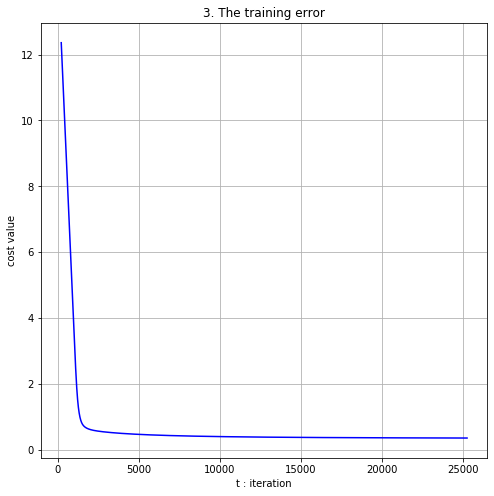

In [4]:
plt.figure(figsize=(8, 8))
plt.plot(iteration, j_value, c = 'blue')
plt.xlabel('t : iteration')
plt.ylabel('cost value')
plt.title('3. The training error')
#plt.legend(['J(theta)'])
plt.grid()
plt.show()

In [5]:
from mpl_toolkits.mplot3d import Axes3D
xlin = np.arange(-1, 1, 0.01)
ylin = np.arange(-1, 1, 0.01)
X, Y = np.meshgrid(xlin, ylin)
Z = (fin_theta[1,0]*X + fin_theta[2,0]*Y + fin_theta[3,0]*(X*Y)
     + fin_theta[4,0]*(X*X) + fin_theta[5,0]*(Y*Y) + fin_theta[6,0]*(X*X*X)
     + fin_theta[7,0]*(X*X*Y) + fin_theta[8,0]*(X*Y*Y) + fin_theta[9,0]*(Y*Y*Y)
     + fin_theta[10,0]*(X*X*X*X) + fin_theta[11,0]*(X*X*X*Y) + fin_theta[12,0]*(X*X*Y*Y)
     + fin_theta[13,0]*(X*Y*Y*Y) + fin_theta[14,0]*(Y*Y*Y*Y) + fin_theta[0,0])
sigmoids = 1 / (1 + np.exp(-Z))
#fig = plt.figure()
#ax = Axes3D(fig)
##ax.set_title("3D Surface Plot")
#ax.plot_surface(X, Y, sigmoids, rstride=1, cstride=1, cmap='coolwarm')
#plt.show()

In [6]:
#fig = plt.figure()
#ax = Axes3D(fig)
#ax.set_title("3D Surface Plot")
#ax.plot_surface(X, Y, sigmoids, rstride=5, cstride=5, alpha=0.3, color = 'blue', edgecolor='black')
#ax.view_init(-30, 30)
#plt.show()

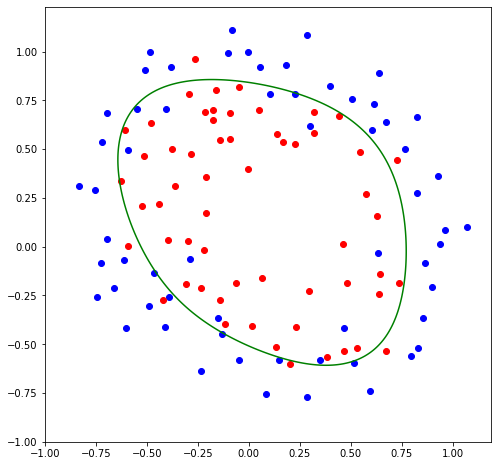

In [7]:
plt.figure(figsize=(8, 8))
plt.contour(X,Y,sigmoids,levels = [0.5],colors='green')
plt.scatter(pointX0, pointY0, c='b')
plt.scatter(pointX1, pointY1, c='r')

In [8]:
theta.shape

(15, 1)

In [9]:
(feature.dot((sigmoid-label).T)).shape

(15, 1)

In [10]:
df = (fin_theta.T).dot(feature)
sg = 1 / (1 + np.exp(-df))
for i in range(118):
    if (sg[0,i]>=0.5):
        sg[0,i]=1
    else:
        sg[0,i]=0

In [11]:
label.shape

(1, 118)

In [12]:
sum = 0
for i in range(118):
    if (sg[0,i]==label[0,i]):
        sum +=1
sum

101

In [13]:
sum/118

0.8559322033898306